In [1]:
import os
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [2]:
os.chdir("F:\ScoreData\Zee TV")

In [18]:
train_ratings=pd.read_csv("train_ratings.csv")
test_ratings=pd.read_csv("test_ratings.csv")


In [15]:
train_ratings['grp']=train_ratings.iloc[:,1:].apply(lambda row:max(row),axis='index')

In [25]:
def trn(data,filename):
    dt=data.groupby("Description").max().T
    dt.index.name="Weeks"
    dt.to_csv("{}.csv".format(filename))

In [26]:
trn(train_ratings,"train_max_rating")
trn(test_ratings,"test_max_rating")


In [3]:
train_r=pd.read_csv("train_max_rating.csv")
test_r=pd.read_csv("test_max_rating.csv")

In [4]:
train_r.head(20)

Weeks  10 KA DUM  ALADDIN NAAM TOH SUNA HOGA  AMUL DID LITTLE MASTERS  \
0       1       0.98                        1.99                     1.69   
1       2       1.06                        2.29                     1.38   
2       3       0.71                        1.96                     1.23   
3       4       0.87                        1.80                     0.92   
4       5       0.65                        1.63                     1.03   
5       6       0.60                        1.55                     0.84   
6       7       0.64                        1.58                     0.78   
7       8       1.58                        1.27                     0.99   
8       9       1.47                        1.24                     0.78   
9      10       1.36                        1.23                     0.97   
10     11       1.48                        1.13                     0.92   
11     12       1.57                        0.94                     0.99   
12     13       1.27                         NaN                     0.83   
13     14       2.09                         NaN                     0.91   
14     15        NaN                         NaN                     1.01   
15     16        NaN                         NaN                     1.01   
16     17        NaN                         NaN                      NaN   
17     18        NaN                         NaN                      NaN   
18     19        NaN                         NaN                      NaN   
19     20        NaN                         NaN                      NaN   

    BELAN WALI BAHU  BEPANAH  BIGG BOSS  BITTI BUSINESS WALI  C I D  \
0              1.62     2.37       2.50                 0.13   1.16   
1              1.42     1.95       1.98                 0.10   0.93   
2              1.30     1.59       2.03                 0.09   0.80   
3              1.30     1.51       1.92                 0.10   0.87   
4              1.25     1.35       2.30                 0.11   0.79   
5              1.19     1.27       2.02                 0.09   0.76   
6              0.97     1.38       1.86                 0.08   0.84   
7              1.02     1.34       1.87                 0.09   0.73   
8              1.01     1.26       2.01                 0.08   0.92   
9              1.01     1.58        NaN                 0.10   0.73   
10             1.22     1.44        NaN                 0.11   0.78   
11             0.98     1.28        NaN                 0.13   0.56   
12             0.76     1.24        NaN                 0.11   0.52   
13             0.83     1.35        NaN                 0.10   0.55   
14             0.76     1.19        NaN                 0.12   0.53   
15             0.56     1.22        NaN                 0.09   0.51   
16             0.58     1.33        NaN                 0.12   0.59   
17             0.56     1.61        NaN                 0.12   0.63   
18             0.51     1.49        NaN                  NaN   0.53   
19             0.52     1.61        NaN                  NaN   0.38   

    CHANDRASHEKAR           ...            ROOP MARD KA NAYA SWAROOP  \
0            0.72           ...                                 1.41   
1            0.71           ...                                 1.17   
2            0.71           ...                                 1.17   
3            0.67           ...                                 1.17   
4            0.63           ...                                 1.19   
5            0.54           ...                                 1.22   
6            0.57           ...                                 1.23   
7            0.50           ...                                 1.80   
8            0.50           ...                                 1.70   
9            0.42           ...                                 1.77   
10           0.40           ...                                 1.66   
11           0.42           ..

In [29]:
pd.melt?

In [5]:
train_r_melt=pd.melt(train_r,id_vars="Weeks",var_name="Description")

In [6]:
train_r_melt.head(15)

Weeks Description  value
0       1   10 KA DUM   0.98
1       2   10 KA DUM   1.06
2       3   10 KA DUM   0.71
3       4   10 KA DUM   0.87
4       5   10 KA DUM   0.65
5       6   10 KA DUM   0.60
6       7   10 KA DUM   0.64
7       8   10 KA DUM   1.58
8       9   10 KA DUM   1.47
9      10   10 KA DUM   1.36
10     11   10 KA DUM   1.48
11     12   10 KA DUM   1.57
12     13   10 KA DUM   1.27
13     14   10 KA DUM   2.09
14     15   10 KA DUM    NaN

In [7]:
train_r_melt.sort_values("Weeks",inplace=True)

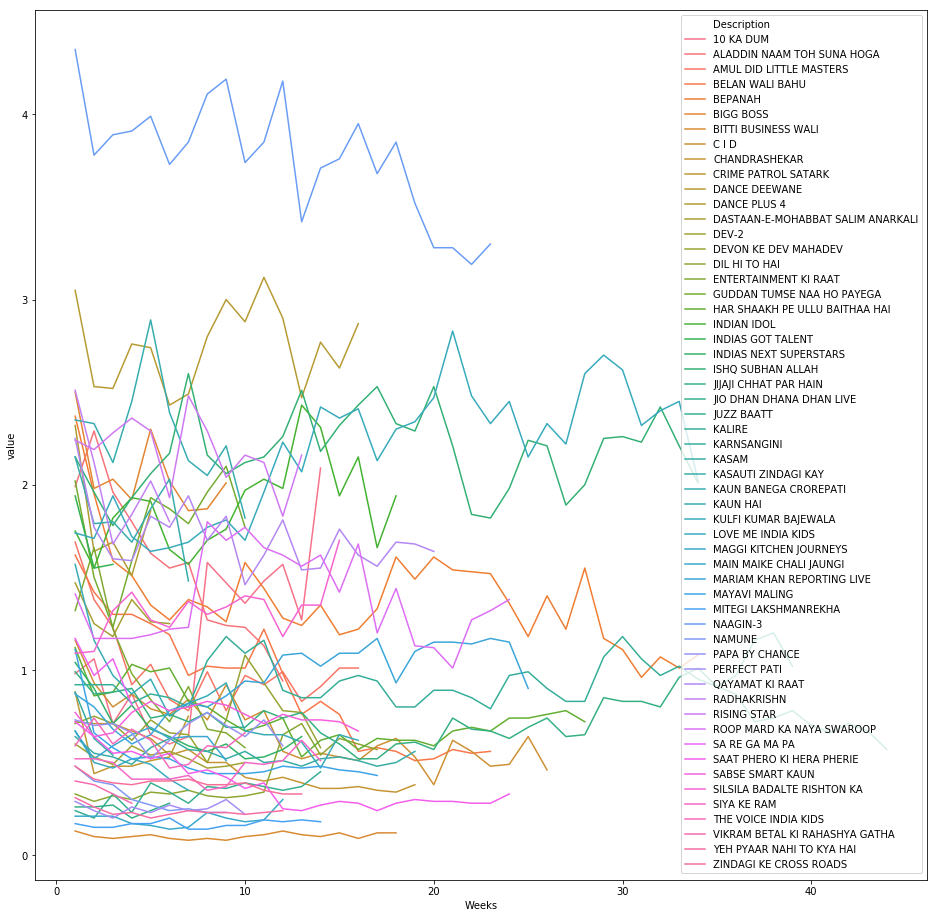

In [102]:
fig,ax=plt.subplots(figsize=(16,16))
sns.lineplot(data=train_r_melt,x="Weeks",y="value",hue="Description",ax=ax)

In [105]:
def create_thresholds(data,weeks_to_consider=[5,6]):
    brkup=(20,50,30)
    wks=data.loc[data.Weeks.isin(weeks_to_consider),:]
    wks=wks.dropna(how='any',axis='index')
    shows=wks.groupby("Description")['value'].mean().to_frame().sort_values("value",ascending=False)
    nrows=shows.shape[0]
    first=round(nrows*brkup[0]/100.0)
    second=round(nrows*brkup[1]/100.0)
    thresholds=[0,first,first+second]
    shows['ranking']=3
    shows.iloc[:first,1]=1
    shows.iloc[first:first+second,1]=2
    shows.rename(columns={"value":"ranked_value"},inplace=True)
    data=data.merge(shows.reset_index(),on="Description",how='left')
    return data

In [106]:
dt=create_thresholds(train_r_melt.copy())

In [107]:
dt.head()

Weeks Description  value  ranked_value  ranking
0      1   10 KA DUM   0.98         0.625      2.0
1      2   10 KA DUM   1.06         0.625      2.0
2      3   10 KA DUM   0.71         0.625      2.0
3      4   10 KA DUM   0.87         0.625      2.0
4      5   10 KA DUM   0.65         0.625      2.0

In [108]:
rank_high=dt[dt.ranking==1]
rank_mid=dt[dt.ranking==2]
rank_low=dt[dt.ranking==3]

In [114]:
 dt.groupby('ranking')['ranked_value'].min()

ranking
1.0    1.86
2.0    0.55
3.0    0.10
Name: ranked_value, dtype: float64

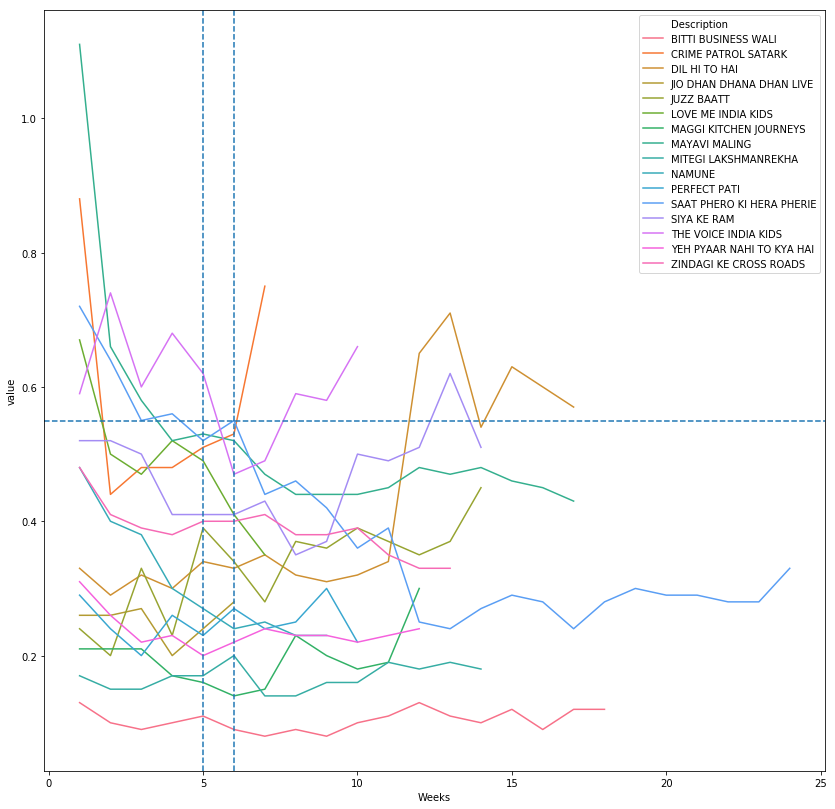

In [117]:
fig,ax2=plt.subplots(figsize=(14,14))
sns.lineplot(data=rank_low,x="Weeks",y="value",hue="Description",ax=ax2)
ax2.axhline(0.55,ls="--")
ax2.axvline(5,ls="--")
ax2.axvline(6,ls="--")
plt.show()

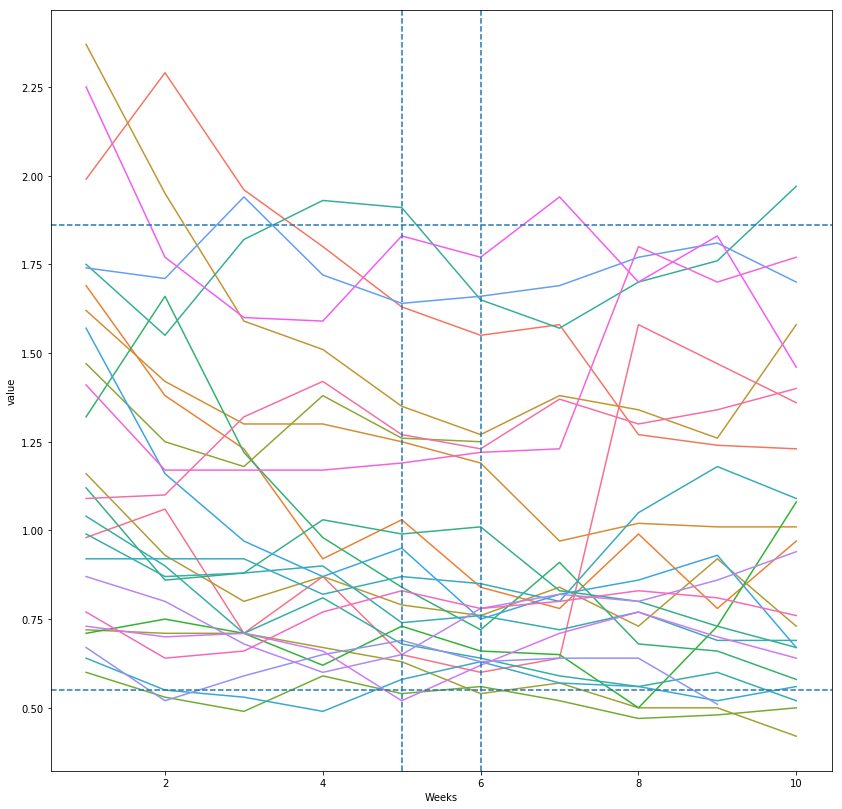

In [122]:
fig,ax3=plt.subplots(figsize=(14,14))
sns.lineplot(data=rank_mid[rank_mid.Weeks<11],x="Weeks",y="value",hue="Description",ax=ax3)
ax3.axhline(0.55,ls="--")
ax3.axhline(1.86,ls="--")
ax3.axvline(5,ls="--")
ax3.axvline(6,ls="--")
ax3.legend().set_visible(False)
plt.show()

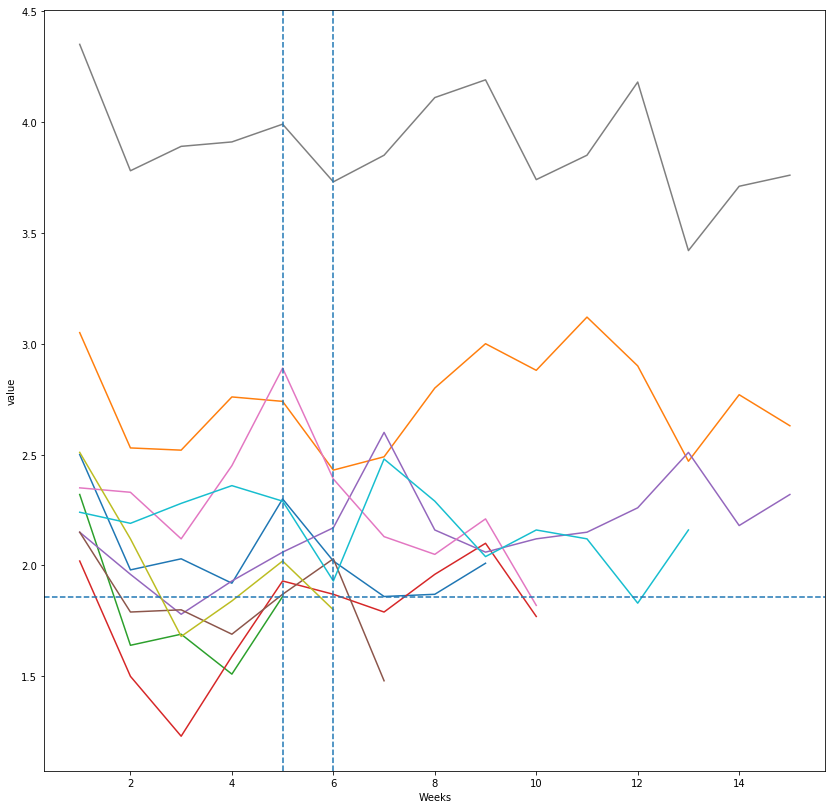

In [124]:
fig,ax4=plt.subplots(figsize=(14,14))
sns.lineplot(data=rank_high[rank_high.Weeks<16],x="Weeks",y="value",hue="Description",ax=ax4)
ax4.axhline(1.86,ls="--")
ax4.axvline(5,ls="--")
ax4.axvline(6,ls="--")
ax4.legend().set_visible(False)
plt.show()

In [44]:
train_r_t=train_r.T
train_r_t.head()

0     1     2     3     4     5     6     7   \
Weeks                       1.00  2.00  3.00  4.00  5.00  6.00  7.00  8.00   
10 KA DUM                   0.98  1.06  0.71  0.87  0.65  0.60  0.64  1.58   
ALADDIN NAAM TOH SUNA HOGA  1.99  2.29  1.96  1.80  1.63  1.55  1.58  1.27   
AMUL DID LITTLE MASTERS     1.69  1.38  1.23  0.92  1.03  0.84  0.78  0.99   
BELAN WALI BAHU             1.62  1.42  1.30  1.30  1.25  1.19  0.97  1.02   

                              8      9   ...     34    35    36    37    38  \
Weeks                       9.00  10.00  ...   35.0  36.0  37.0  38.0  39.0   
10 KA DUM                   1.47   1.36  ...    NaN   NaN   NaN   NaN   NaN   
ALADDIN NAAM TOH SUNA HOGA  1.24   1.23  ...    NaN   NaN   NaN   NaN   NaN   
AMUL DID LITTLE MASTERS     0.78   0.97  ...    NaN   NaN   NaN   NaN   NaN   
BELAN WALI BAHU             1.01   1.01  ...    NaN   NaN   NaN   NaN   NaN   

                              39    40    41    42    43  
Weeks                       40.0  41.0  42.0  43.0  44.0  
10 KA DUM                    NaN   NaN   NaN   NaN   NaN  
ALADDIN NAAM TOH SUNA HOGA   NaN   NaN   NaN   NaN   NaN  
AMUL DID LITTLE MASTERS      NaN   NaN   NaN   NaN   NaN  
BELAN WALI BAHU              NaN   NaN   NaN   NaN   NaN  

[5 rows x 44 columns]

In [84]:
nrows=train_r_t.shape[0]-1
brkup=(20,50,30)
first=round(nrows*brkup[0]/100.0)
second=round(nrows*brkup[1]/100.0)
thresholds=[0,first,first+second]
def avg_ratings(train):
    train['first4']=train.iloc[:,1:5].mean(skipna=True,axis=1)
    train['next4']=train.iloc[:,5:9].mean(skipna=True,axis=1)
    train['first4_ex1']=train.iloc[:,2:5].mean(skipna=True,axis=1)
    train['next6']=train.iloc[:,5:11].mean(skipna=True,axis=1)
    train['first3']=train.iloc[:,1:4].mean(skipna=True,axis=1)
    train['first2']=train.iloc[:,1:3].mean(skipna=True,axis=1)
    return train

def cal_threshold(series):
    cutoff={}
    cutoff['first_cutoff']=np.min(series.values[:first])
    cutoff['second_cutoff']=np.min(series.values[first:first+second])
    return cutoff

def create_rank(series,cutoff):
    temp=series.copy()
    temp[:]=1
    temp[(series>=cutoff['second_cutoff']) & (series<cutoff['first_cutoff']) ]=2
    temp[series>=cutoff['first_cutoff']]=1
    temp[series<cutoff['second_cutoff']]=3
    return temp
    

def cal_err(train,srt="first4"):
    train=train.iloc[1:,:10]
    train.reset_index(inplace=True)
    train=avg_ratings(train)
    train=train[['first2','first3','first4','next4','first4_ex1','next6']]
    train.sort_values(srt,ascending=False,inplace=True)
    cutoff=cal_threshold(train[srt])
    print(cutoff)
    train=train.apply(lambda series:create_rank(series,cutoff),axis='columns')
    print("--------------------------------")
    print("\n")
    print(pd.crosstab(index=train[srt],columns=train.next4))
    print("--------------------------------")
    print("\n")
    print(pd.crosstab(index=train[srt],columns=train.next6))
    return train

In [85]:
trn=cal_err(train_r_t.copy(),srt="first3")

{'first_cutoff': 1.8833333333333335, 'second_cutoff': 0.6366666666666666}
--------------------------------


next4   1.0  2.0  3.0
first3               
1.0       7    4    0
2.0       4   18    6
3.0       1    1   15
--------------------------------


next6   1.0  2.0  3.0
first3               
1.0       7    4    0
2.0       4   19    5
3.0       1    0   16


In [86]:
40/56

0.7142857142857143

In [69]:
pd.pivot_table(data=trn,index="first4",columns="next4",aggfunc='count',values="next6")

next4   1.0   2.0   3.0
first4                 
1.0     8.0   3.0   NaN
2.0     5.0  19.0   4.0
3.0     1.0   1.0  15.0

In [70]:
42/56

0.75

In [71]:
pd.crosstab(index=trn.first4,columns=trn.next4)

next4   1.0  2.0  3.0
first4               
1.0       8    3    0
2.0       5   19    4
3.0       1    1   15

In [72]:
pd.crosstab(index=trn.first4,columns=trn.next6)

next6   1.0  2.0  3.0
first4               
1.0       7    4    0
2.0       5   18    5
3.0       1    1   15

In [76]:
pd.crosstab(index=trn.first4_ex1,columns=trn.next4)

next4       1.0  2.0  3.0
first4_ex1               
1.0           8    3    0
2.0           6   19    3
3.0           1    2   14

In [77]:
pd.crosstab(index=trn.first4_ex1,columns=trn.next6)

next6       1.0  2.0  3.0
first4_ex1               
1.0           9    2    0
2.0           5   20    3
3.0           1    1   15

In [45]:
train=train_r_t.copy()
train=train.iloc[1:,:10]
train.reset_index(inplace=True)
print(train.shape)
train.head()


(56, 11)


index     0     1     2     3     4     5     6     7  \
0                   10 KA DUM  0.98  1.06  0.71  0.87  0.65  0.60  0.64  1.58   
1  ALADDIN NAAM TOH SUNA HOGA  1.99  2.29  1.96  1.80  1.63  1.55  1.58  1.27   
2     AMUL DID LITTLE MASTERS  1.69  1.38  1.23  0.92  1.03  0.84  0.78  0.99   
3             BELAN WALI BAHU  1.62  1.42  1.30  1.30  1.25  1.19  0.97  1.02   
4                     BEPANAH  2.37  1.95  1.59  1.51  1.35  1.27  1.38  1.34   

      8     9  
0  1.47  1.36  
1  1.24  1.23  
2  0.78  0.97  
3  1.01  1.01  
4  1.26  1.58

In [49]:
train.iloc[:,5:9].mean(skipna=True,axis=1)

0     0.867500
1     1.507500
2     0.910000
3     1.107500
4     1.335000
5     2.012500
6     0.092500
7     0.780000
8     0.560000
9     0.596667
10    2.615000
11    1.860000
12    1.255000
13    0.522500
14    0.635000
15    0.335000
16    0.787500
17    1.887500
18    0.907500
19    1.707500
20         NaN
21    0.617500
22    2.247500
23    0.747500
24    0.260000
25    0.345000
26    0.892500
27         NaN
28    0.585000
29    1.793333
30    2.365000
31    0.845000
32    1.690000
33    0.416667
34    0.170000
35    0.650000
36    0.762500
37    0.490000
38    0.162500
39    3.920000
40    0.247500
41    0.655000
42    0.247500
43    1.810000
44    1.910000
45    2.247500
46    1.360000
47         NaN
48    0.492500
49    0.810000
50    1.292500
51    0.400000
52    0.542500
53         NaN
54    0.222500
55    0.397500
dtype: float64

In [46]:
train['first4']=train.iloc[:,1:5].mean(skipna=True,axis=0)
train['next4']=train.iloc[:,5:9].mean(skipna=True,axis=0)
train['first4_ex1']=train.iloc[:,2:5].mean(skipna=True)
train['next6']=train.iloc[:,5:11].mean(skipna=True)
train.head()

index     0     1     2     3     4     5     6     7  \
0                   10 KA DUM  0.98  1.06  0.71  0.87  0.65  0.60  0.64  1.58   
1  ALADDIN NAAM TOH SUNA HOGA  1.99  2.29  1.96  1.80  1.63  1.55  1.58  1.27   
2     AMUL DID LITTLE MASTERS  1.69  1.38  1.23  0.92  1.03  0.84  0.78  0.99   
3             BELAN WALI BAHU  1.62  1.42  1.30  1.30  1.25  1.19  0.97  1.02   
4                     BEPANAH  2.37  1.95  1.59  1.51  1.35  1.27  1.38  1.34   

      8     9    first4     next4  first4_ex1     next6  
0  1.47  1.36  1.243036       NaN         NaN       NaN  
1  1.24  1.23  1.080714       NaN    1.080714       NaN  
2  0.78  0.97  1.027500       NaN    1.027500       NaN  
3  1.01  1.01  1.027778       NaN    1.027778       NaN  
4  1.26  1.58       NaN  1.068846         NaN  1.068846

In [43]:
train.iloc[1:,0:11].head()

index     0     1     2     3     4     5     6     7  \
1  ALADDIN NAAM TOH SUNA HOGA  1.99  2.29  1.96  1.80  1.63  1.55  1.58  1.27   
2     AMUL DID LITTLE MASTERS  1.69  1.38  1.23  0.92  1.03  0.84  0.78  0.99   
3             BELAN WALI BAHU  1.62  1.42  1.30  1.30  1.25  1.19  0.97  1.02   
4                     BEPANAH  2.37  1.95  1.59  1.51  1.35  1.27  1.38  1.34   
5                   BIGG BOSS  2.50  1.98  2.03  1.92  2.30  2.02  1.86  1.87   

      8     9  
1  1.24  1.23  
2  0.78  0.97  
3  1.01  1.01  
4  1.26  1.58  
5  2.01   NaN